In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak

In [2]:
filename = 'pionplus_1k.npy'
file = open(filename, 'rb')
mc_truth = np.load(file,allow_pickle=True) #Added Generator E and Angle
data = np.load(file,allow_pickle=True)

test_file = open('test.npy', 'rb')
test_data = np.load(test_file,allow_pickle=True)

In [18]:
print("----------------- ORIGINAL test.npy -------------------")
print('number of images in event', len(test_data[0]))
print(test_data[0][0])

----------------- ORIGINAL test.npy -------------------
number of images in event 400
{'ECAL_E': array([11.408997, 10.134888, 19.30542 , 14.242554, 20.951843, 11.209106,
       10.694885, 11.903381, 12.82196 , 15.626526, 10.928345, 10.554504,
       13.726807, 11.607361, 10.772705, 14.030457, 15.257263, 17.51709 ,
       18.663025, 33.013916, 10.758972, 24.105835, 12.272644, 39.894104,
       20.812988, 18.746948, 11.660767, 11.894226, 12.651062],
      dtype=float32), 'ECAL_x': array([-594.03131616, -593.1254495 , -585.7008283 , -568.79712634,
       -565.41638594, -552.55656479, -538.12773657, -519.41230129,
       -508.36421346, -493.02951857, -478.60069035, -446.63987366,
       -588.41842827, -648.31827733, -644.03167028, -640.76357953,
       -645.95605323, -657.91000773, -665.57735517, -669.86396222,
       -639.85771287, -638.95184621, -641.66944618, -644.14431992,
       -639.61498663, -902.84471169, -650.48538652, -605.32213023,
       -606.22799689]), 'ECAL_y': array([1094.5

In [4]:
print("--------------- NEW .npy ----------------")
print('number of images in event', len(data[0]))
print(data[4][0])
#print(np.shape(data))

--------------- NEW .npy ----------------
number of images in event 400
{'ECAL_E': array([195.216    , 195.216    , 195.216    , 195.216    , 195.216    ,
        10.747495 ,  20.584288 , 195.216    , 195.216    ,  77.86807  ,
        21.054716 ,   6.4834776,  12.580962 , 195.216    ,  36.964867 ,
        45.57734  , 195.216    , 195.216    ,  49.64836  ,   6.893595 ,
        60.552666 ,   7.104685 ,   8.377255 ,  11.236017 ,  13.757035 ,
        47.44096  ,  91.824135 , 128.00496  ,  30.535671 ,  20.059578 ,
        76.637726 ,   7.442429 ,  19.546932 ,  34.624786 ,  20.306856 ,
       167.34608  ,   6.7367854,   6.44126  ,  17.496342 , 102.511314 ,
        40.51118  ,   2.888917 ,  15.403536 ,   1.0132318,   2.3400831,
       186.04868  ,  19.745958 ,  31.36797  , 189.63116  ,   3.7574015,
        37.07343  , 195.216    ,  30.493454 ,  35.15553  ,   4.420827 ,
        14.504896 ,   1.8877474,   6.6463184,   1.4414428,   2.2797718,
        14.99945  ,   2.0807438,  63.12193  ,  13.690

In [5]:
mc_truth.item().get('true_energy')

20.007061

In [6]:
#============ Original ============================
X = []
Y = []
with open('test.npy', 'rb') as f:#wrong file for now
#with open(filename, 'rb') as f:
    data = np.load(f,allow_pickle=True)
    ievt = 0
    print('number of images in event', len(data[ievt]))
    ## Here we loop over all "images", which are created by integrating HCAL sampling layers defing 3 sectors defined 
    ## by two z position that define boundary. Note for all images ECAL is the same (no longitudinal separation in ECAL)
    for im in range(len(data[ievt])):
        event = np.c_[data[ievt][im]['HCAL1_x'][0],data[ievt][im]['HCAL1_y'][0],data[ievt][im]['HCAL1_E'][0]]
        depths = np.array([2*np.ones(len(data[ievt][im]['HCAL1_x'][0]))]).flatten()
        if (len(data[ievt][im]['HCAL2_x'])>0):
            event = np.concatenate([event,np.c_[data[ievt][im]['HCAL2_x'][0],data[ievt][im]['HCAL2_y'][0],data[ievt][im]['HCAL2_E'][0]]])
            depths = np.concatenate([depths,np.array([3*np.ones(len(data[ievt][im]['HCAL2_x'][0]))]).flatten()])
        if (len(data[ievt][im]['HCAL3_x'])>0):
            event = np.concatenate([event,np.c_[data[ievt][im]['HCAL3_x'][0],data[ievt][im]['HCAL3_y'][0],data[ievt][im]['HCAL3_E'][0]]])
            depths = np.concatenate([depths,np.array([4*np.ones(len(data[ievt][im]['HCAL3_x'][0]))]).flatten()])
        event = np.concatenate([event,np.c_[data[ievt][im]['ECAL_x'],data[ievt][im]['ECAL_y'],data[ievt][im]['ECAL_E']]])
        depths = np.concatenate([depths,np.array([1*np.ones(len(data[ievt][im]['ECAL_x']))]).flatten()])
        event = np.insert(event, 3, depths,axis=1)
        event = np.insert(event, 4, data[ievt][im]['boundary'][0]*np.ones(len(event)),axis=1) #better to make these global features, but I did not want to download the latest energyflow package
        event = np.insert(event, 5, data[ievt][im]['boundary'][1]*np.ones(len(event)),axis=1)
        X += [event]
        trueenergy = 20.007061 #Miguel, please add this!
        Y += [trueenergy]
X = np.array(X)
Y = np.array(Y)
print(np.shape(X))
print(np.shape(Y))

number of images in event 400
(400, 96, 6)
(400,)


In [7]:
def awk_to_numpy_padded(awk_array,fill_val,ncell_max=1200,cell_axis=2,clip=True):

    none_padded = ak.pad_none(ak.ArrayBuilder.snapshot(awk_array), ncell_max, axis=cell_axis, clip=True)
    none_to_val = ak.fill_none(none_padded,fill_val,axis=cell_axis)
    array = np.squeeze(ak.to_numpy(none_to_val))

    print("new numpy shape =",np.shape(array))
    return(array)

ncell_max = 1200 #Root file indicates avg. of ~270 per ECal and HCal each. 
cell_axis = 2
n_cell_variables = 6
fill_val = np.zeros(n_cell_variables) #for zero paddin awkward array

In [8]:
X_awk = ak.ArrayBuilder()
X_awk.begin_list()
Y = []

with open(filename, 'rb') as f:
#with open("test.npy", 'rb') as f:
    mc_truth = np.load(f,allow_pickle=True)
    data = np.load(f,allow_pickle=True)
    
    print('N Events:', len(data),'N Images per Event:',len(data[0]))
    
    ievt=4
    if not(ievt==999):
    #for ievt in range(0,len(data)):
    #for ievt in range(0,1):
        
        ## Here we loop over all events and then all "images", which are created by integrating HCAL sampling layers defing 3 sectors defined 
        ## by two z position that define boundary. Note for all images ECAL is the same (no longitudinal separation in ECAL)

        for im in range(len(data[ievt])):
            #FIXME: assumes ECAL is always hit...
            event = np.c_[data[ievt][im]['ECAL_x'],data[ievt][im]['ECAL_y'],data[ievt][im]['ECAL_E']]
            depths = np.array([1*np.ones(len(data[ievt][im]['ECAL_x']))]).flatten()
            
            if (ievt == im == 0):
                print("ECAL X:", np.shape(data[ievt][im]['ECAL_x']), "+ ECAL Y", np.shape(data[ievt][im]['ECAL_y']),
                  "+ ECAL E", np.shape(data[ievt][im]['ECAL_E']),"=",np.shape(event), "[using np.c_]")

            if (len(data[ievt][im]['HCAL1_x'])>0):
                event = np.concatenate([event,np.c_[data[ievt][im]['HCAL1_x'][0],data[ievt][im]['HCAL1_y'][0],data[ievt][im]['HCAL1_E'][0]]])
                depths = np.concatenate([depths,np.array([2*np.ones(len(data[ievt][im]['HCAL1_x'][0]))]).flatten()])
            
            if (len(data[ievt][im]['HCAL2_x'])>0):
                event = np.concatenate([event,np.c_[data[ievt][im]['HCAL2_x'][0],data[ievt][im]['HCAL2_y'][0],data[ievt][im]['HCAL2_E'][0]]])
                depths = np.concatenate([depths,np.array([3*np.ones(len(data[ievt][im]['HCAL2_x'][0]))]).flatten()])
                
            if (len(data[ievt][im]['HCAL3_x'])>0):
                event = np.concatenate([event,np.c_[data[ievt][im]['HCAL3_x'][0],data[ievt][im]['HCAL3_y'][0],data[ievt][im]['HCAL3_E'][0]]])
                depths = np.concatenate([depths,np.array([4*np.ones(len(data[ievt][im]['HCAL3_x'][0]))]).flatten()])
            
            if (ievt == im == 0):
                print("HCAL X:", np.shape(data[ievt][im]['HCAL3_x']), "+ HCAL Y", np.shape(data[ievt][im]['HCAL3_y']), 
                      "+ HCAL E",np.shape(data[ievt][im]['HCAL3_E']),"= ", "-> np.append to ECAL ->",np.shape(event))
            
            event = np.insert(event, 3, depths,axis=1)
            event = np.insert(event, 4, data[ievt][im]['boundary'][0]*np.ones(len(event)),axis=1)
            #FIXME: use num_global_features -- Number of additional features to be 
            #concatenated with the latent space observables to form the input to F.
            event = np.insert(event, 5, data[ievt][im]['boundary'][1]*np.ones(len(event)),axis=1)
            
            X_awk.append(event)
            trueenergy = mc_truth.item().get('true_energy') #TARGET
            Y += [trueenergy]
            
X_awk.end_list()

X = awk_to_numpy_padded(X_awk,fill_val,ncell_max,cell_axis)
Y = np.array(Y)
print("X shape =",np.shape(X),"([Images X Events][Cells][XYEDBB])") #X,Y,Energy,Depth,Boundary,Boundary
print("Y shape =",np.shape(Y),"[MC Truth Energy]")

N Events: 1000 N Images per Event: 400
new numpy shape = (400, 1200, 6)
X shape = (400, 1200, 6) ([Images X Events][Cells][XYEDBB])
Y shape = (400,) [MC Truth Energy]


---

In [9]:
import energyflow as ef
from energyflow.archs import PFN
from energyflow.utils import data_split

import tensorflow as tf
tf.keras.utils.normalize(X, axis=-1, order=1)

In [10]:
for x in X:
    xy_avg = np.average(x[:,0:2], axis=0)
    x[:,0:2] -= xy_avg
    x[:,2] /= 100. #could make this smarter
    x[:,4:6] /= 100.
    
#QUESTION: What's the ultimate goal of this normalization? Can we use tensorflow built in normalization tools?
print("NaNs in X data = ",np.any(np.isnan(X)))
print("NaNs in Y data = ",np.any(np.isnan(Y)))

NaNs in X data =  False
NaNs in Y data =  False


In [11]:
(X_train, X_val, X_test,
 Y_train, Y_val, Y_test) = data_split(X, Y, val=0.2, test=0.3)

In [12]:
# Probably want to standardize the input and output energies, or at least put them in units where the mean is O(1)

In [13]:
Phi_sizes, F_sizes = (100, 100, 128), (100, 100, 100)
output_act, output_dim = 'linear', 1
loss = 'mse' #mean-squared error
pfn = PFN(input_dim=X.shape[-1], Phi_sizes=Phi_sizes, F_sizes=F_sizes, 
          output_act=output_act, output_dim=output_dim, loss=loss)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, None, 6)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 100)    700         ['input[0][0]']                  
                                                                                                  
 activation (Activation)        (None, None, 100)    0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 100)    10100       ['activation[0][0]']             
                                                                                              

In [14]:
pfn.fit(X_train, Y_train,
        epochs=100,
        batch_size=100,
        validation_data=(X_val, Y_val),
        verbose=1)

Epoch 1/100


2022-03-21 10:28:42.589980: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 [==============================] - 1s 1s/step - loss: 1080249692132039507327890706239848448.0000 - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 139ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 131ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 124ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 125ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 135ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 142ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 8/100
2/2 [============================

In [15]:
pfn.layers
mypreds = pfn.predict(X_test,batch_size=100)
print(np.shape(mypreds))

(120, 1)


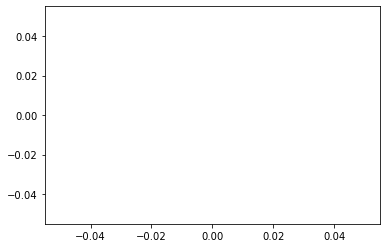

In [16]:
plt.scatter(Y_test,mypreds)

In [17]:
print(Y_test)
print(mypreds)

[20.007061 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061
 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061
 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061
 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061
 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061
 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061
 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061
 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061
 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061
 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061
 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061
 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061
 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061
 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061 20.007061
 20.00